In [1]:
import meep as mp
import pandas as pd
import sys
sys.path.append('../../metamaterials')
from metamaterials import lithography as lt

Using MPI version 4.0, 1 processes


/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
nrows = 50
ncols = 50
dx = 5e-4

In [3]:
a = 1.2e-3
d = 0.5*a
t = 0.02e-3
a, d, t = 10*a, 10*d, 10*t

geometry = [mp.Block(size=mp.Vector3(d,d,t), center=mp.Vector3(), material=mp.Medium(index=1.5))]

M12 = lt.draw_metamaterial(geometry, a, nrows, ncols, dx=dx)

In [4]:
M12_layered = lt.draw_metamaterial(geometry, a, nrows, ncols, nlayers=5, dx=dx)

In [5]:
a = 0.8e-3
d = 0.5*a
t = 0.02e-3
a, d, t = 10*a, 10*d, 10*t

geometry = [mp.Block(size=mp.Vector3(d,d,t), center=mp.Vector3(), material=mp.Medium(index=1.5))]

M08 = lt.draw_metamaterial(geometry, a, nrows, ncols, dx=dx)

In [6]:
l, w = 1.2, .5

geometry = [mp.Block(size=mp.Vector3(l,w,t), center=mp.Vector3(), material=mp.Medium(index=1.5)),
            mp.Block(size=mp.Vector3(w,l,t), center=mp.Vector3(y=(w-l)/2), material=mp.Medium(index=1.5)),]
Mfull = lt.draw_metamaterial(geometry, a, 1, 1, dx=10*dx)

---

In [8]:
P1 = M12.copy()
P1['pi'] = 0.1
P1['pf'] = 0.1
P1['X'] -= 2.5
P1['Y'] -= 2.5

P2 = M12.copy()
P2['pi'] = 0.5
P2['pf'] = 0.5
P2['Y'] -= 2.5

P3 = M12.copy()
P3['pi'] = 0.8
P3['pf'] = 0.8
P3['X'] += 2.5
P3['Y'] -= 2.5

P4 = M12.copy()
P4['pi'] = 1.1
P4['pf'] = 1.1
P4['X'] -= 2.5
P4['Y'] += 2.5

P5 = M12.copy()
P5['pi'] = 1.2
P5['pf'] = 1.2
P5['Y'] += 2.5

M12o = M12.copy()
M12o['X'] -= 2.5

M08o = M08.copy()
M08o['X'] += 2.5

M12_layered['X'] += 2.5
M12_layered['Y'] += 2.5

In [9]:
M = pd.concat([P1, P2, P3, P4, P5, M12o, M08o, Mfull, M12_layered])

In [10]:
lt.save_to_matlab(M, 'printing2.mat')

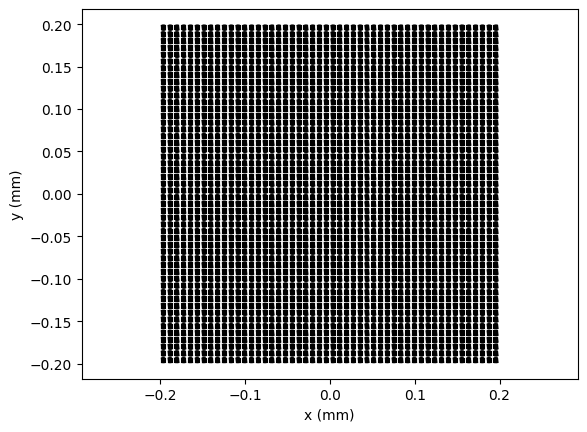

In [13]:
lt.plot_lithography(M08)

In [3]:
from metamaterials import lithography as lt

M_ = lt.read_matlab('printing2.mat')

Using MPI version 4.0, 1 processes


In [4]:
M_['t'] = 0.01

In [6]:
M_

,xi,yi,pi,xf,yf,pf,t,X,Y,Z
0,-0.2970,-0.297,0.1,-0.2970,-0.291,0.1,0.01,-2.5,-2.5,-0.0001
1,-0.2970,-0.291,0.1,-0.2965,-0.297,0.1,0.01,-2.5,-2.5,-0.0001
2,-0.2965,-0.297,0.1,-0.2965,-0.291,0.1,0.01,-2.5,-2.5,-0.0001
3,-0.2965,-0.291,0.1,-0.2960,-0.297,0.1,0.01,-2.5,-2.5,-0.0001
4,-0.2960,-0.297,0.1,-0.2960,-0.291,0.1,0.01,-2.5,-2.5,-0.0001
...,...,...,...,...,...,...,...,...,...,...
670673,0.2955,0.291,1.0,0.2955,0.297,1.0,0.01,2.5,2.5,0.0239
670674,0.2955,0.297,1.0,0.2960,0.291,1.0,0.01,2.5,2.5,0.0239
670675,0.2960,0.291,1.0,0.2960,0.297,1.0,0.01,2.5,2.5,0.0239
670676,0.2960,0.297,1.0,0.2965,0.291,1.0,0.01,2.5,2.5,0.0239


In [8]:
lt.save_to_matlab(M_, 'printing3.mat')